# Documentation

# Data Exploration

In [2]:
import marvin_wine_classifier_engine

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [5]:
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [6]:
labes = ["low", "medium", "high"]
bins = [0, 5, 7, 10]

white_wine["quality_label"] = pd.cut(white_wine["quality"], bins, labels=labes)
red_wine["quality_label"] = pd.cut(red_wine["quality"], bins, labels=labes)

In [7]:
wines = pd.concat([red_wine, white_wine])

In [11]:
wines["quality_label"].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [6]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Valores possíveis para qualidade

In [7]:
sorted(wines['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

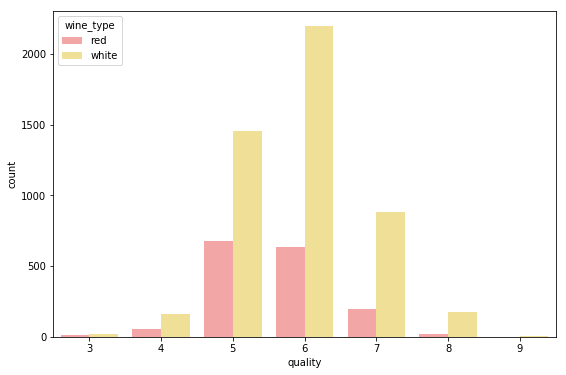

In [8]:
# Multi-bar Plot

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
palette={"red": "#FF9999", "white": "#FFE888"}, ax=ax)

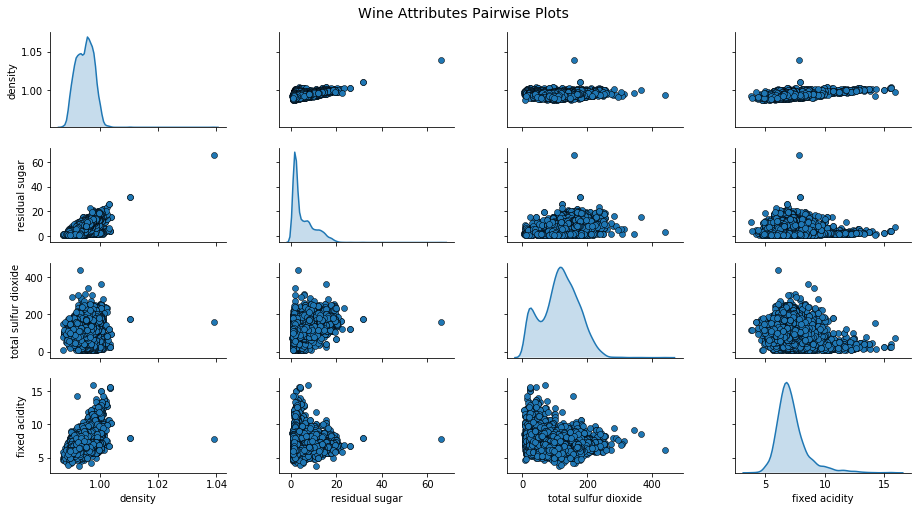

In [9]:
# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(wines[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

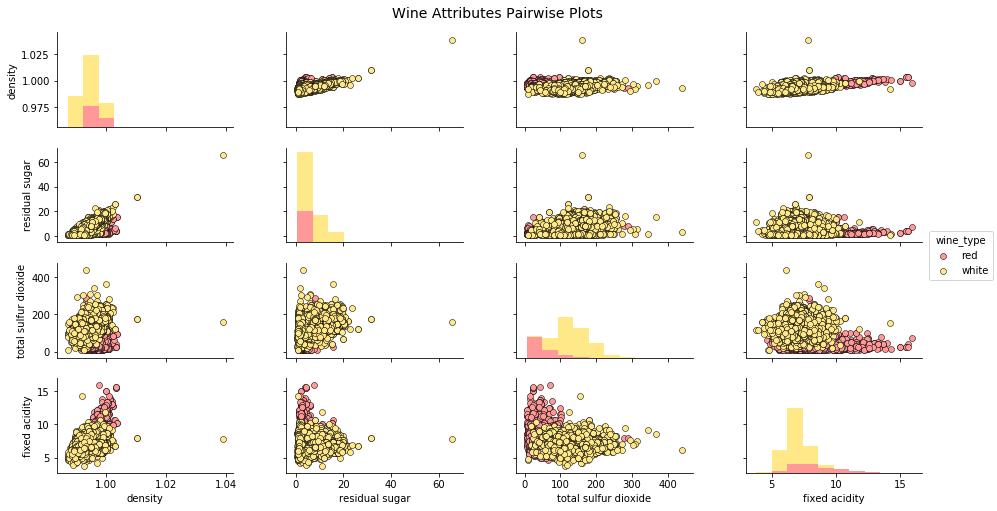

In [10]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

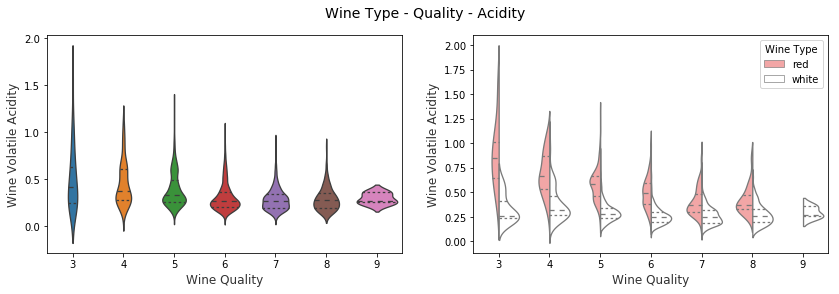

In [11]:
# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')

# Engine creation

## Acquisitor and Cleaner

* Download the datasets.
* Categorize the quality as low, medium or high.

In [12]:
import pandas as pd

white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

white_wine["wine_type"] = "white"
red_wine["wine_type"] = "red"   

labes = ["low", "medium", "high"]
bins = [0, 5, 7, 10]

white_wine["quality_label"] = pd.cut(white_wine["quality"], bins, labels=labes)
red_wine["quality_label"] = pd.cut(red_wine["quality"], bins, labels=labes)

marvin_initial_dataset = {
    "red": red_wine,
    "white": white_wine
}

## Training Preparator

In [13]:
params = {"test_size": 0.3, "random_state": 456, "wine_types": ["red", "white"]}

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

dataset = {}

for wine_type in params["wine_types"]:
    X = marvin_initial_dataset[wine_type][cols]
    y = marvin_initial_dataset[wine_type]["quality_label"]
    
    X_resampled, y_resampled = SMOTE(random_state=params["random_state"]).fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=params["test_size"],
        random_state=params["random_state"])
    
    dataset[wine_type] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train, 
        "y_test": y_test
    }
    
marvin_dataset = dataset

## Trainer

In [15]:
from sklearn.ensemble import RandomForestClassifier

models = {}

for wine_type in params["wine_types"]:
    clf = RandomForestClassifier(random_state=params['random_state'])
    clf.fit(marvin_dataset[wine_type]["X_train"], marvin_dataset[wine_type]["y_train"])

    models[wine_type] = {
        "clf": clf
    }
    
marvin_model = models

In [16]:
marvin_model

{'red': {'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=456, verbose=0, warm_start=False)},
 'white': {'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=456, verbose=0, warm_start=False)}}

In [17]:
from sklearn.metrics import classification_report

for wine_type in params["wine_types"]:
    prediction = marvin_model[wine_type]["clf"].predict(marvin_dataset[wine_type]["X_test"])
    metrics = classification_report(marvin_dataset[wine_type]["y_test"], prediction)
    
    print("Wine type: ", wine_type)
    print(metrics)
    
marvin_metrics = metrics

Wine type:  red
             precision    recall  f1-score   support

       high       0.94      0.99      0.97       258
        low       0.72      0.85      0.78       220
     medium       0.84      0.68      0.76       276

avg / total       0.84      0.84      0.84       754

Wine type:  white
             precision    recall  f1-score   support

       high       0.92      0.98      0.95       924
        low       0.81      0.86      0.83       935
     medium       0.81      0.71      0.76       912

avg / total       0.85      0.85      0.85      2771



## Predictor Preparator

In [18]:
input_message = {
    "wine_type": "red",
    "fixed acidity": 7.95230379,   
    "volatile acidity": 0.34343089,   
    "citric acid": 0.37179949,   
    "residual sugar": 2.07615189,
    "chlorides": 0.07565691,  
    "free sulfur dioxide": 13.96232916,  
    "total sulfur dioxide": 22.06693674,   
    "density": 0.9948003,
    "pH": 3.21514633,   
    "sulphates": 0.76075342,  
    "alcohol": 11.48284557
}

In [19]:
import pandas as pd

cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "wine_type"
]

input_message = pd.DataFrame([input_message])[cols]


## Predictor

In [20]:
wine_type = input_message["wine_type"][0]
features = input_message.drop("wine_type", axis=1)

if wine_type not in params["wine_types"]:
    pred = None
else:
    pred = marvin_model[wine_type]["clf"].predict(features)[0]
    
final_prediction = pred

In [21]:
print(final_prediction)

high


In [22]:
red_prediction = marvin_model["red"]["clf"].predict(input_message.drop("wine_type", axis=1))
white_prediction = marvin_model["white"]["clf"].predict(input_message.drop("wine_type", axis=1))

In [23]:
print("Prediction with red wine model: ", red_prediction[0])
print("Prediction with white wine model: ", white_prediction[0])

Prediction with red wine model:  high
Prediction with white wine model:  low
